# Does faculty salary vary by gender and/or rank? 
A linear modeling approach.

## Set up
Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

Before performing the statistical analysis here, make sure you have completed `part-1.ipynb` to get to know your data.

In [1]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import matplotlib.pyplot as plt # plotting (optional)
%matplotlib inline 

In [2]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data= pd.read_table(data, sep='\s+')

## Simple linear regression: what is the salary increase associated with each additional year in your current position (`yr`)?

In [3]:
# Create a simple linear model using `smf.ols()` that assesses the relationship between 
# years in current position (`yd`) with salary (`sl`).
lm = smf.ols(formula='sl ~ yr', data=salary_data).fit()

# Then, use the `.summary()` method of your model to print our information about your model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     48.22
Date:                Wed, 24 Oct 2018   Prob (F-statistic):           7.34e-09
Time:                        18:29:54   Log-Likelihood:                -507.38
No. Observations:                  52   AIC:                             1019.
Df Residuals:                      50   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.817e+04   1003.658     18.100      0.000    1.62e+04    2.02e+04
yr           752.7978    108.409      6.944      0.000     535.051     970.544
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.015
Skew:                           0.509   Prob(JB):                       0.0815
Kurtosis:                       4.130   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assess the fit of your model**. In the space provided here, you should use clear and interpretable language to interpret your model. For example, you can use statements like, the beta value of *** indicates that each unit increase in *** is associated with an *** increase in *** ).

Describe the _accuracy of your coefficient estimates_. In doing so, interpret the following: 
- **Coefficient** (beta) in your model: 752.8 _Each additional year, there is a 752.8 change in salary_
- **Standard errors** of your estimate: 108.4 _There is a 752.8 change in salary with a buffer of plus/minus 108.4_
- **Confidence intervals** around your coefficient: [535.1, 970.5] _There is a 95% chance that the true mean falls between 535.1 and 970.5_

Describe the _**accuracy** of your model_. In doing so, interpret the following:
- **R-squared** value: 0.491 _This model has an adjusted R squared of 0.481, which indicates that the model explains about half of the variability of the response data around its mean_

In [11]:
# Create a `predictions` column of your dataframe by 
# making predictions from your linear model. Hint: use the `.predict()` method of your model
salary_data['pred'] = lm.predict()


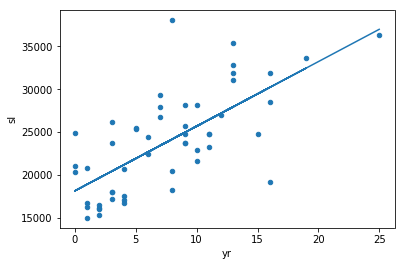

In [12]:
# Draw a scatterplot comparing years in current rank (`yr` -- x axis) to salary (`sl` -- y axis).
# Add to that scatterplot your "best fit line" that shows how well the model fits our data
# (this line will have `yr` as the x axis, and your `predictions` on the y axis)
salary_data.plot('yr', 'sl', kind='scatter')
plt.plot(salary_data.yr, salary_data.simple_pred)

## Multiple Regression

Now you will improve (well, likely improve) your model by predicing your outcome of interest (salary) using **multiple** independent variables

In [18]:
# Using multiple regression, create a linear model that uses 
# sex, rank, and years in current rank variables to estimate salary
full_model =  smf.ols(formula='sl ~ sx + rk + yr', data=salary_data).fit()
# Then, use the `.summary()` method of your model to print out information about the model.
full_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.64e-18
Time:                        10:21:44   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000    1.49e+04    1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533   -2203.323    1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000    2551.030    6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000    7647.536    1.13e+04
yr                390.9358     75.383      5.186      0.000     239.285     542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assess the fit of your model**. In the space provided here, you should use clear and interpretable language to interpret your model. For each independent variable, you should write out a sentence explaining the beta and confidence intervals. For example, 

> There was an observed association of BETA (LOWER_BOUND, UPPER_BOUND) salary increase for each unit increase in VARIABLE.

Each addition year is associated with a 390.9358 change in salary, with a standard error of 75.383 and there is a 95% chance that the true B1 falls between 239.285 and 542.587.

Being male is associated with a -524.1492 change in salary, with has a standard error of 834.687
and there is a 95% chance that the true B1 falls between -2203.323 and 1155.024.

Being an additional associate level professor is associated with a 4373.9154 change in salary, with a standard
error of 906.124 and there is a 95% chance that the true B1 falls between 2551.030 and 6196.801.
Being a full rank professor is associated with a 9483.8419 change in salary, with a standard error of
912.795 and there is a 95% chance that the true B1 falls between 7647.536 and 1.13e+04.


Describe the _**accuracy** of your model_. In doing so, interpret the following:
- **R-squared** value: _The model gives us an adjusted R-Squared value of 0.833, which indicates that the model explains about 83% of the variability of the response data around its mean._

Write down at least one relationship in your model that you find surprising (i.e., would not have expected given your analysis up until this point)

In [9]:
# Create a `mult_preds` column of your dataframe by 
# making predictions from your new (multivariate) linear model. Hint: use the `.predict()` method of your model
salary_data['mult_preds'] = full_model.predict()


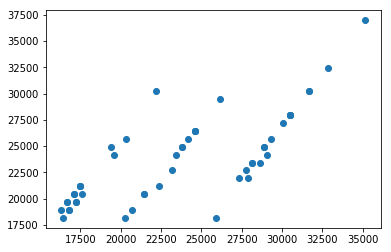

In [15]:
# Visually compare these predictions (`mult_preds`) to those from your linear model (`predictions`) 
# by creating a scatterplot of the two variables
p1 = plt.scatter(x=salary_data['mult_preds'], y=salary_data['pred'])


Write down at least one relationship in this graph that you find notable.

## Assessing prediction accuracy

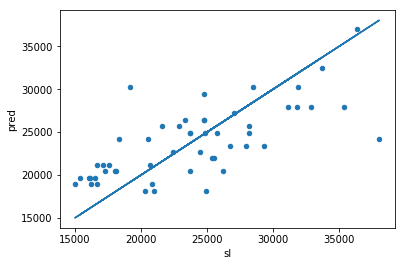

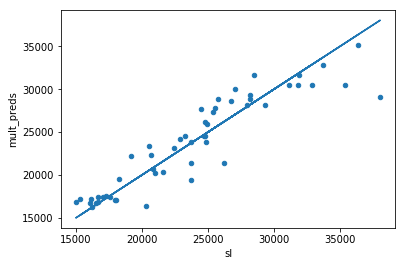

In [16]:
# Make a scatterplot that compares the actual salary data (`sl` -- x axis) 
# to the multivariate predictions (`mult_preds` -- y axis)
# Add a line to this plot showing where the perfect prediction values would be 
# (i.e., a line whose x and y values are both the `sl` column)
salary_data.plot(x='sl', y='pred', kind="scatter")
plt.plot(salary_data.sl, salary_data.sl)
salary_data.plot(x='sl', y='mult_preds', kind="scatter")
plt.plot(salary_data.sl, salary_data.sl)

Using the r-squared values of each model -- univariate (`predictions`) and multivariate (`mult_preds`) -- describe 
which one explains more variance?

Multivariate (`multi_preds`) explains more variance- this indicates that there are several factors that are predictors for salary.

### Residual plots

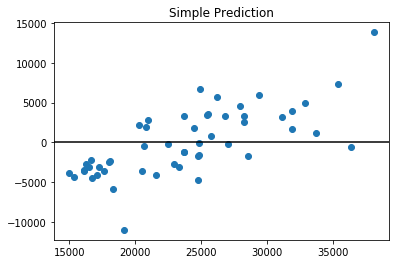

Text(0.5,1,'Multiple Predictions')

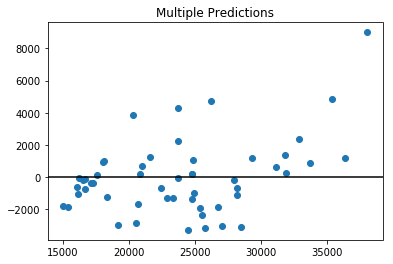

In [17]:
# For each model, plot the salary (`sl`) v.s. the *residuals* (difference between actual and predicted values)
# Add a horizontal line at 0 to help interpret the graph
# (I suggest rendering adjacent plots, though you are welcome to make them separately)
plt.scatter(salary_data.sl, salary_data.sl- salary_data.simple_pred)
plt.axhline(0, color='black')
plt.title("Simple Prediction")
plt.show()
plt.scatter(salary_data.sl, salary_data.sl- salary_data.mult_predictions)
plt.axhline(0, color='black')
plt.title("Multiple Predictions")

Write at least **one observation** based on the residual plots above. More specifically, describe how each each model systematically fits (or _fails_ to fit) the data

The linear model appears to have a larger spread of data, and multiple outliers.
The multiple regression model appears to have a smaller spread of data, and has less visible outliers.